In [64]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_moons,make_regression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from DecisionTree import DecisionTreeCla
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [65]:
X,y = make_moons(n_samples=150,noise=.1,random_state=42)
X1,y1 = make_regression(n_samples=150,noise=.1,random_state=42)


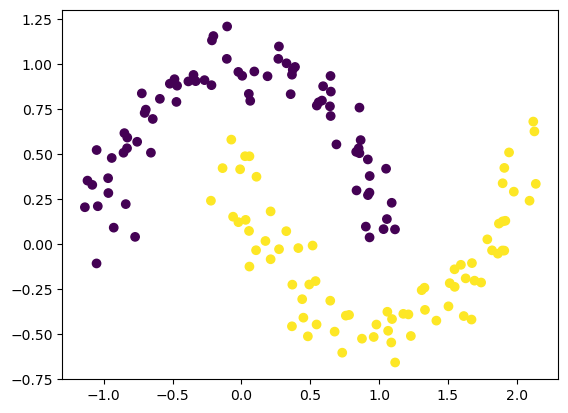

In [66]:
plt.scatter(X[:,0],X[:,1],c=y)

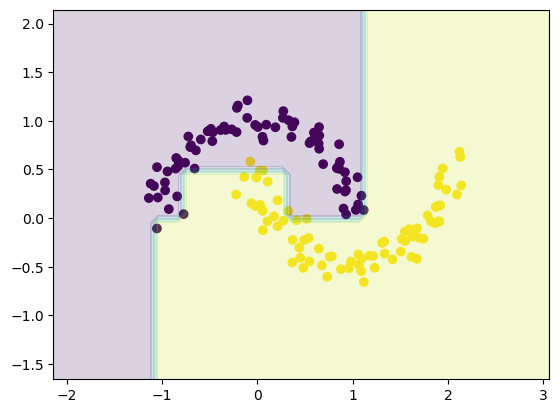

In [67]:
model = DecisionTreeCla(max_depth=5)
model.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
x1_min,x1_max = X[:,0].min()-1 , X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1 , X[:,1].max()+1
xx1,xx2 = np.meshgrid(
    np.arange(x1_min,x1_max,.1),
    np.arange(x2_min,x2_max,.1)
)
meshgrid_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = model.predict(meshgrid_points)
z = z.reshape(xx1.shape) 
plt.contourf(xx1,xx2,z,alpha = .2)

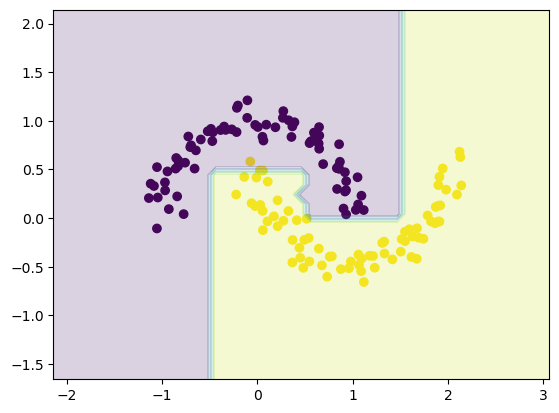

In [68]:
model = BaggingClassifier()
model.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
x1_min,x1_max = X[:,0].min()-1 , X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1 , X[:,1].max()+1
xx1,xx2 = np.meshgrid(
    np.arange(x1_min,x1_max,.1),
    np.arange(x2_min,x2_max,.1)
)
meshgrid_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = model.predict(meshgrid_points)
z = z.reshape(xx1.shape) 
plt.contourf(xx1,xx2,z,alpha = .2)

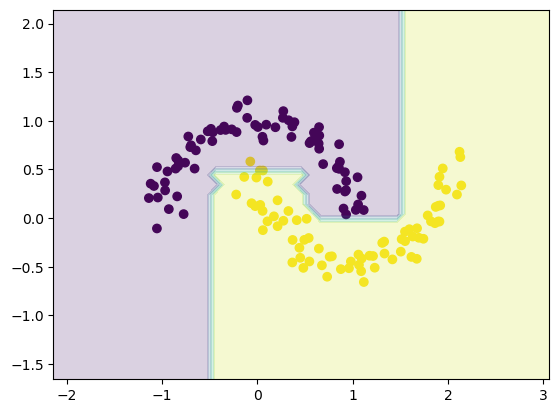

In [69]:
bag_class = BaggingClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=500,bootstrap=True,max_samples=100)
bag_class.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
x1_min,x1_max = X[:,0].min()-1 , X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1 , X[:,1].max()+1
xx1,xx2 = np.meshgrid(
    np.arange(x1_min,x1_max,.1),
    np.arange(x2_min,x2_max,.1)
)
meshgrid_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = bag_class.predict(meshgrid_points)
z = z.reshape(xx1.shape) 
plt.contourf(xx1,xx2,z,alpha = .2)

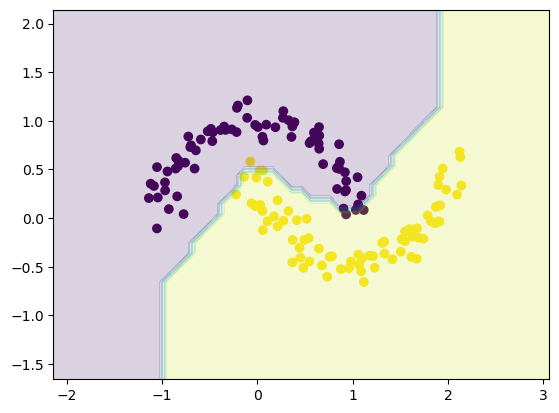

In [70]:
bag_class = BaggingClassifier(ExtraTreesClassifier (max_depth=5),n_estimators=500,bootstrap=True,max_samples=100)
bag_class.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
x1_min,x1_max = X[:,0].min()-1 , X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1 , X[:,1].max()+1
xx1,xx2 = np.meshgrid(
    np.arange(x1_min,x1_max,.1),
    np.arange(x2_min,x2_max,.1)
)
meshgrid_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = bag_class.predict(meshgrid_points)
z = z.reshape(xx1.shape) 
plt.contourf(xx1,xx2,z,alpha = .2)

In [71]:
'''CV = cross_val_score(model,X,y)
print(CV)
print(CV.mean())'''

'CV = cross_val_score(model,X,y)\nprint(CV)\nprint(CV.mean())'

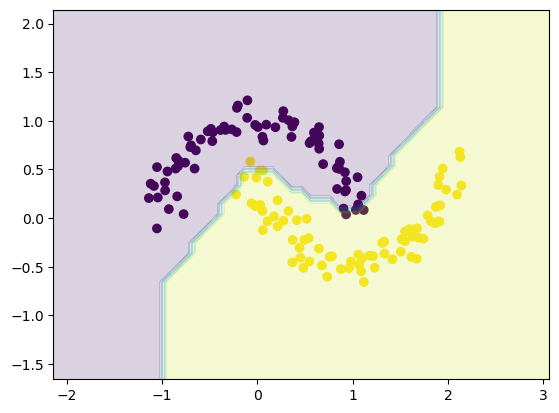

In [72]:
rand_forest_class = RandomForestClassifier(max_depth=5,n_estimators=500,bootstrap=True,max_samples=100)
bag_class.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
x1_min,x1_max = X[:,0].min()-1 , X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1 , X[:,1].max()+1
xx1,xx2 = np.meshgrid(
    np.arange(x1_min,x1_max,.1),
    np.arange(x2_min,x2_max,.1)
)
meshgrid_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = bag_class.predict(meshgrid_points)
z = z.reshape(xx1.shape) 
plt.contourf(xx1,xx2,z,alpha = .2)

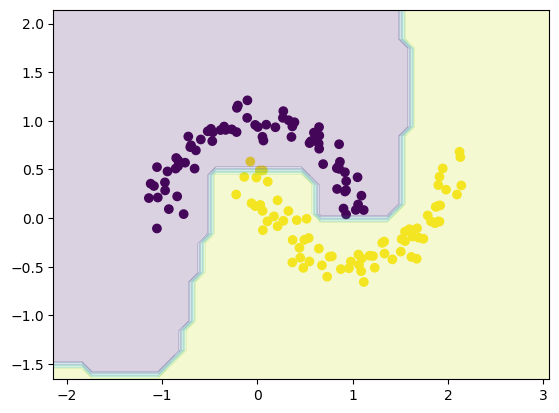

In [73]:
voting = VotingClassifier(estimators=[
    ("LR",LogisticRegression()),
    ("DT",DecisionTreeClassifier()),
    ("svm",SVC(probability=True))
],voting="soft")
voting.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
x1_min,x1_max = X[:,0].min()-1 , X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1 , X[:,1].max()+1
xx1,xx2 = np.meshgrid(
    np.arange(x1_min,x1_max,.1),
    np.arange(x2_min,x2_max,.1)
)
meshgrid_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = voting.predict(meshgrid_points)
z = z.reshape(xx1.shape) 
plt.contourf(xx1,xx2,z,alpha = .2)

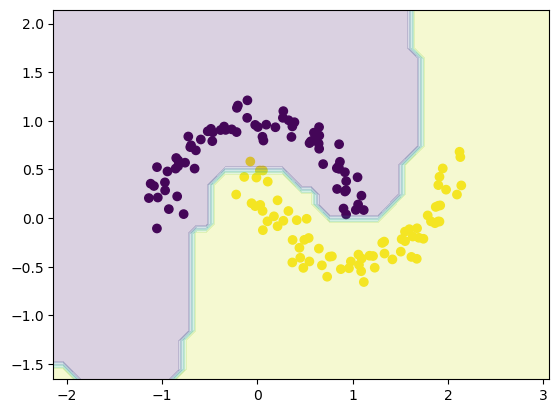

In [74]:
voting = VotingClassifier(estimators=[
    ("LR",LogisticRegression()),
    ("DT",DecisionTreeClassifier()),
    ("svm",SVC(probability=True))
],voting="hard")
voting.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
x1_min,x1_max = X[:,0].min()-1 , X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1 , X[:,1].max()+1
xx1,xx2 = np.meshgrid(
    np.arange(x1_min,x1_max,.1),
    np.arange(x2_min,x2_max,.1)
)
meshgrid_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = voting.predict(meshgrid_points)
z = z.reshape(xx1.shape) 
plt.contourf(xx1,xx2,z,alpha = .2)